Populating the interactive namespace from numpy and matplotlib


(-0.5, 0.5)

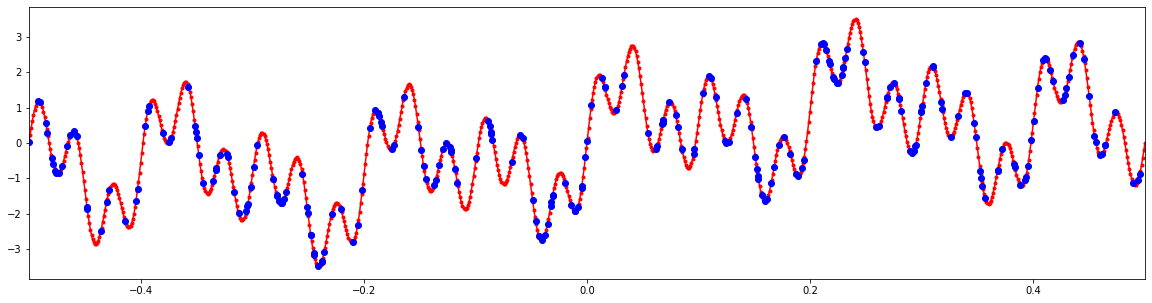

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from nfft import nfft

np.random.seed(12345)

%pylab inline --no-import-all

# function we want to reconstruct
k=[1,5,10,30] # modulating coefficients
def myf(x,k): 
    return sum(np.sin(x*k0*(2*np.pi)) for k0 in k)

x=np.linspace(-0.5,0.5,1000)   # 'continuous' time/spatial domain; -0.5<x<+0.5
y=myf(x,k)                     # 'true' underlying trigonometric function

fig=plt.figure(1,(20,5))
ax =fig.add_subplot(111)

ax.plot(x,y,'red')
ax.plot(x,y,'r.')

                        # we should sample at a rate of >2*~max(k)
M=256                   # number of nodes
N=128                   # number of Fourier coefficients

nodes =np.random.rand(M)-0.5 # non-uniform oversampling
values=myf(nodes,k)     # nodes&values will be used below to reconstruct 
                        # original function using the Solver

ax.plot(nodes,values,'bo')

ax.set_xlim(-0.5,+0.5)

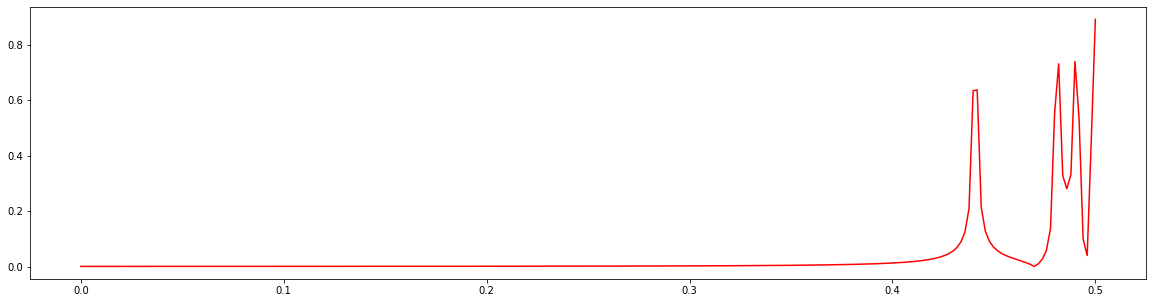

In [9]:
import pandas as pd
import numpy as np

def compute_nfft(sample_instants, sample_values):
    N = len(sample_instants)
    T = sample_instants[-1] - sample_instants[0]
    x = np.linspace(0.0, 1.0 / (2.0 * T), N // 2)
    y = nfft(sample_instants, sample_values)
    y = 2.0 / N * np.abs(y[0:N // 2])
    return (x, y)
k=[1,5,10,30] # modulating coefficients
def myf(x,k): 
    return sum(np.sin(x*k0*(2*np.pi)) for k0 in k)


# define evaluation points
# t = -0.5 + np.random.rand(500)
t = -0.5 + np.linspace(0,1,500)
f_t = myf(t,k)
# define Fourier coefficients
N = 1500
# non-equispaced fast Fourier transform
w,f_w = compute_nfft(t, f_t)

fig=plt.figure(1,(20,5))
ax =fig.add_subplot(111)

ax.plot(w,f_w,'red')
# ax.plot(x,y,'r.')

                        # we should sample at a rate of >2*~max(k)
M=2*N                   # number of nodes
N=N                   # number of Fourier coefficients

nodes =np.random.rand(M)-0.5 # non-uniform oversampling
values=myf(nodes,k)     # nodes&values will be used below to reconstruct 
                        # original function using the Solver

# ax.plot(nodes,values,'bo')

# ax.set_xlim(-0.5,+0.5)

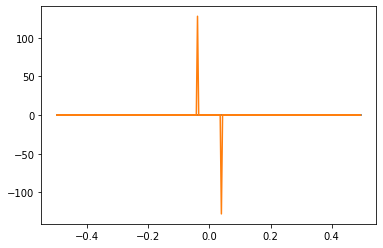

In [40]:
import matplotlib.pyplot as plt
N=256
M=10
t = (M/N)*np.arange(N)
sp = np.fft.fft(np.sin(2.0*np.pi*t))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()

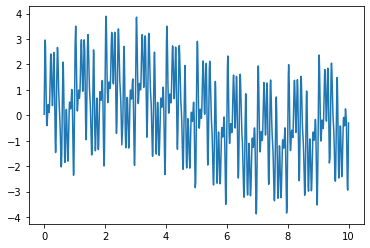

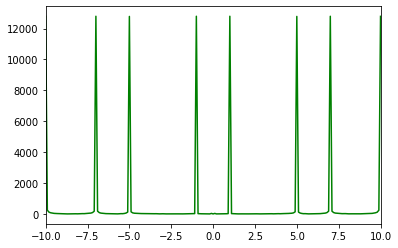

In [118]:
import itertools
import operator
from scipy.interpolate import interp1d

k=[0.1, 1, 5,7,10] # modulating coefficients
def myf(x): 
    return sum(np.sin(x*k0*(2*np.pi)) for k0 in k)

def monotone_increasing(lst):
    pairs = zip(lst, lst[1:])
    return all(itertools.starmap(operator.lt, pairs))

FR = 0.2
smooth = 0.01
def myfft(t,f):
    if monotone_increasing(t):
        a = t[0]
        b = t[-1]
        T = b - a
        try:
            N = t.size
        except:
            N = len(t)
        fun = interp1d(t, f, kind='cubic')
        
        Nr = 10*N
        timestep = (b - a)/(Nr - 1)
        tr = np.linspace(a,b,Nr)
        fr = fun(tr)
        freq = np.fft.fftfreq(Nr, d=timestep)
        sp = np.fft.fft(fr)
        sp *= 0.5*(1 + np.tanh((freq**2 - FR**2)/smooth))
        freq, sp = zip(*sorted(zip(freq,sp)))
        return freq, sp
    else:
        return None, None

a = 0
b = 10
N=2560
timestep = (b-a)/N
t = ((b - a)/N)*np.arange(N)
t = np.random.rand(N)*(b - a)
t = np.sort(t)
f = myf(t)

freq, sp = myfft(t,f)

plt.plot(t,f)
plt.show()

plt.plot(freq, np.abs(sp), 'g-')
plt.xlim([-10,10])
plt.show()

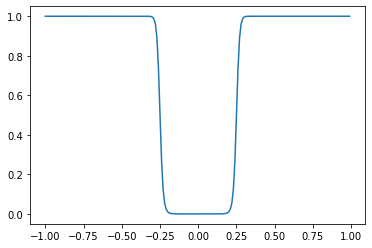

In [120]:
x=np.arange(-1,1,0.01)
R=0.25
y=0.5*(1 + np.tanh((x**2 - R**2)/0.01))
plt.plot(x, y)